### 과제2. CRIME 데이터로 시계열 데이터 분석 진행하기

#### 0. 데이터 분석 준비

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime.csv to crime.csv


In [176]:
crime = pd.read_csv('crime.csv')

In [177]:
crime.head()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


#### 1. REPORTED_DATE을 시계열 데이터으로 변경하기

In [178]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [179]:
crime['REPORTED_DATE'] = pd.to_datetime(crime['REPORTED_DATE'])

In [180]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


#### 2. REPORTED_DATE을 인덱스로 지정하기

In [181]:
crime_dt = crime.set_index('REPORTED_DATE')

#### 3. 분석해보기

##### 1) 2015년 심야시간 범죄 및 교통사고 발생건수 추이 살펴보기

- 심야시간 기준 세우기 : 1~4시

In [ ]:
crime_dt15 = crime_dt.loc['2015'].sort_index()

In [ ]:
crime_dt15_night = crime_dt15.between_time('1:00', '4:00')

(1) 범죄 발생건수 주별, 월별 추이

In [ ]:
crime_sp = crime_dt15_night[['IS_CRIME']]

In [ ]:
crime_spw_W = crime_sp.resample('W').sum()

<Axes: xlabel='REPORTED_DATE'>

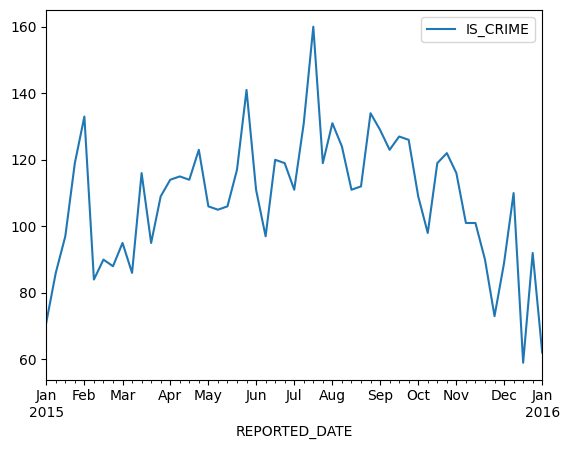

In [ ]:
crime_spw_W.plot()

In [ ]:
crime_spw_M = crime_sp.resample('M').sum()

<Axes: xlabel='REPORTED_DATE'>

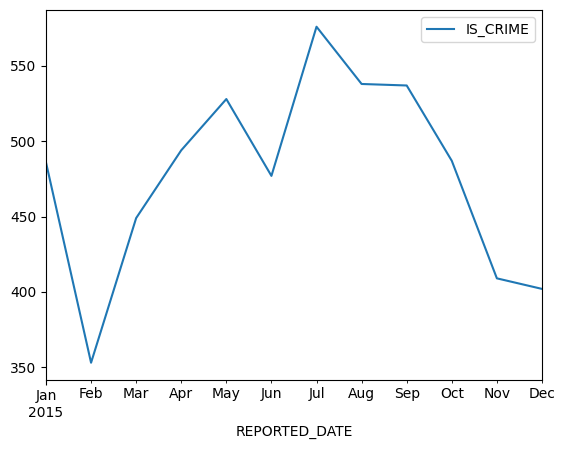

In [ ]:
crime_spw_M.plot()

- 2월달에 압도적으로 줄어들은 것 확인 가능
- 11-2월의 건수가 6-9월의 건수보다 확실하게 적은 것을 보니 2015년에는 여름이 겨울보다 범죄 건수가 많았다고 말할 수 있음
- 겨울에 가장 많이 발생한 달인 1월의 건수가 여름에 가장 적게 발생한 6월의 건수와 비슷한 것 역시 확인 가능

(2) 교통사고 발생건수 주별, 월별 추이

In [ ]:
crime_traf = crime_dt15_night[['IS_TRAFFIC']]

In [ ]:
crime_traf_W = crime_traf.resample('W').sum()

<Axes: xlabel='REPORTED_DATE'>

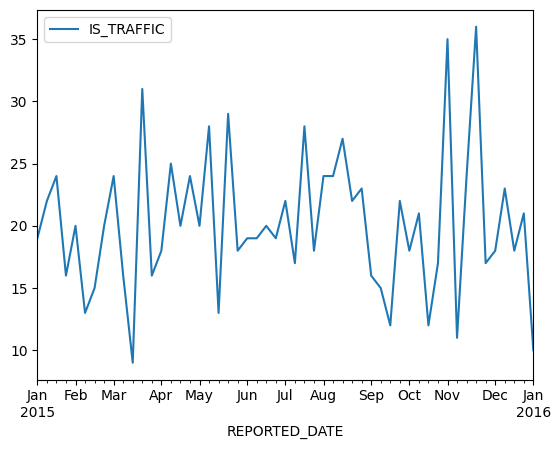

In [ ]:
crime_traf_W.plot()

In [ ]:
crime_traf_M = crime_traf.resample('M').sum()

<Axes: xlabel='REPORTED_DATE'>

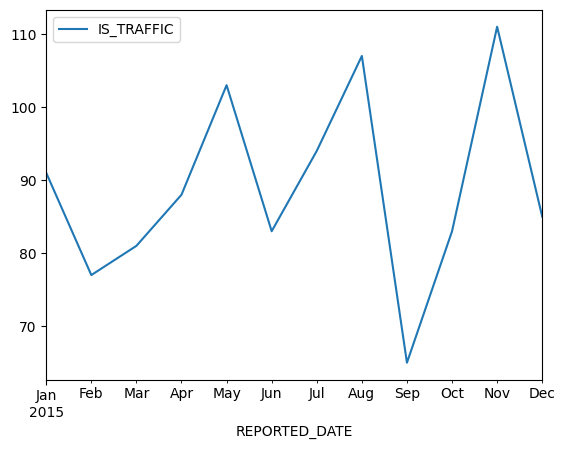

In [ ]:
crime_traf_M.plot()

- 9월달에 압도적으로 줄어들었는 것을 확인 가능
- 2015년 11월 심야에 가장 교통사고가 많이 일어났지만 이 수치는 5월, 8월과 거의 유사
- 5월부터 12월까지 교통사고 건수가 늘었다가 줄었다가 반복되는 것을 확인 가능

- 전체적인 추이를 보기에는 주별 데이터보다 월별 데이터를 보는 것이 분석에 용이해보임

##### 2) 2016년 월별 발생 범죄유형 추이 살펴보기

###### [1] 데이터 만들기
- 방법을 모르겠어서 노가다로..

In [215]:
crime_dt16_01 = crime_dt.loc['2016-01'].sort_index()
crime_16_01 = crime_dt16_01[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_01 = pd.DataFrame(crime_16_01)
crime_16_01.columns = ['2016-01']

In [216]:
crime_16_01

,2016-01
OFFENSE_CATEGORY_ID,
traffic-accident,1841
all-other-crimes,1543
public-disorder,902
larceny,707
drug-alcohol,523
theft-from-motor-vehicle,512
burglary,404
auto-theft,389
other-crimes-against-persons,333


In [217]:
crime_dt16_02 = crime_dt.loc['2016-02'].sort_index()
crime_16_02 = crime_dt16_02[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_02 = pd.DataFrame(crime_16_02)
crime_16_02.columns = ['2016-02']

In [218]:
crime_16_02

,2016-02
OFFENSE_CATEGORY_ID,
traffic-accident,1859
all-other-crimes,1325
public-disorder,769
larceny,652
drug-alcohol,493
theft-from-motor-vehicle,438
burglary,403
auto-theft,379
other-crimes-against-persons,338


In [219]:
crime_dt16_03 = crime_dt.loc['2016-03'].sort_index()
crime_16_03 = crime_dt16_03[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_03 = pd.DataFrame(crime_16_03)
crime_16_03.columns = ['2016-03']

In [220]:
crime_16_03

,2016-03
OFFENSE_CATEGORY_ID,
traffic-accident,1874
all-other-crimes,1477
public-disorder,773
larceny,712
drug-alcohol,533
theft-from-motor-vehicle,489
burglary,383
other-crimes-against-persons,361
auto-theft,344


In [221]:
crime_dt16_04 = crime_dt.loc['2016-04'].sort_index()
crime_16_04 = crime_dt16_04[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_04 = pd.DataFrame(crime_16_04)
crime_16_04.columns = ['2016-04']

In [222]:
crime_16_04

,2016-04
OFFENSE_CATEGORY_ID,
traffic-accident,1878
all-other-crimes,1408
public-disorder,872
larceny,733
drug-alcohol,624
theft-from-motor-vehicle,550
other-crimes-against-persons,419
burglary,396
auto-theft,381


In [223]:
crime_dt16_05 = crime_dt.loc['2016-05'].sort_index()
crime_16_05 = crime_dt16_05[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_05 = pd.DataFrame(crime_16_05)
crime_16_05.columns = ['2016-05']

In [224]:
crime_16_05

,2016-05
OFFENSE_CATEGORY_ID,
traffic-accident,2009
all-other-crimes,1492
public-disorder,938
larceny,788
drug-alcohol,581
theft-from-motor-vehicle,580
other-crimes-against-persons,425
auto-theft,403
burglary,373


In [225]:
crime_dt16_06 = crime_dt.loc['2016-06'].sort_index()
crime_16_06 = crime_dt16_06[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_06 = pd.DataFrame(crime_16_06)
crime_16_06.columns = ['2016-06']

In [226]:
crime_16_06

,2016-06
OFFENSE_CATEGORY_ID,
traffic-accident,1961
all-other-crimes,1267
public-disorder,869
larceny,797
theft-from-motor-vehicle,624
drug-alcohol,449
other-crimes-against-persons,438
auto-theft,400
burglary,387


In [227]:
crime_dt16_07 = crime_dt.loc['2016-07'].sort_index()
crime_16_07 = crime_dt16_07[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_07 = pd.DataFrame(crime_16_07)
crime_16_07.columns = ['2016-07']

In [228]:
crime_16_07

,2016-07
OFFENSE_CATEGORY_ID,
traffic-accident,2002
all-other-crimes,1157
public-disorder,854
larceny,819
theft-from-motor-vehicle,532
burglary,439
drug-alcohol,414
other-crimes-against-persons,405
auto-theft,404


In [229]:
crime_dt16_08 = crime_dt.loc['2016-08'].sort_index()
crime_16_08 = crime_dt16_08[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_08 = pd.DataFrame(crime_16_08)
crime_16_08.columns = ['2016-08']

In [230]:
crime_16_08

,2016-08
OFFENSE_CATEGORY_ID,
traffic-accident,2072
all-other-crimes,1327
larceny,925
public-disorder,813
theft-from-motor-vehicle,642
drug-alcohol,503
burglary,459
auto-theft,454
other-crimes-against-persons,414


In [231]:
crime_dt16_09 = crime_dt.loc['2016-09'].sort_index()
crime_16_09 = crime_dt16_09[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_09 = pd.DataFrame(crime_16_09)
crime_16_09.columns = ['2016-09']

In [232]:
crime_16_09

,2016-09
OFFENSE_CATEGORY_ID,
traffic-accident,2120
all-other-crimes,1447
public-disorder,851
larceny,822
drug-alcohol,573
theft-from-motor-vehicle,561
auto-theft,418
other-crimes-against-persons,384
burglary,377


In [233]:
crime_dt16_10 = crime_dt.loc['2016-10'].sort_index()
crime_16_10 = crime_dt16_10[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_10 = pd.DataFrame(crime_16_10)
crime_16_10.columns = ['2016-10']

In [234]:
crime_16_10

,2016-10
OFFENSE_CATEGORY_ID,
traffic-accident,2156
all-other-crimes,1432
public-disorder,791
larceny,751
theft-from-motor-vehicle,618
drug-alcohol,557
auto-theft,440
other-crimes-against-persons,438
burglary,387


In [235]:
crime_dt16_11 = crime_dt.loc['2016-11'].sort_index()
crime_16_11 = crime_dt16_11[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_11 = pd.DataFrame(crime_16_11)
crime_16_11.columns = ['2016-11']

In [236]:
crime_16_11

,2016-11
OFFENSE_CATEGORY_ID,
traffic-accident,1913
all-other-crimes,1264
public-disorder,726
larceny,686
theft-from-motor-vehicle,504
drug-alcohol,456
auto-theft,396
burglary,341
other-crimes-against-persons,316


In [237]:
crime_dt16_12 = crime_dt.loc['2016-12'].sort_index()
crime_16_12 = crime_dt16_12[['OFFENSE_CATEGORY_ID']].value_counts()
crime_16_12 = pd.DataFrame(crime_16_12)
crime_16_12.columns = ['2016-12']

In [238]:
crime_16_12

,2016-12
OFFENSE_CATEGORY_ID,
traffic-accident,2010
all-other-crimes,1294
public-disorder,684
larceny,660
theft-from-motor-vehicle,462
auto-theft,392
drug-alcohol,370
other-crimes-against-persons,350
burglary,307


In [239]:
crime_16_final = pd.concat([crime_16_01, crime_16_02, crime_16_03, crime_16_04,
                            crime_16_05, crime_16_06, crime_16_07, crime_16_08,
                            crime_16_09, crime_16_10, crime_16_11, crime_16_12],
                           axis = 1)

###### [2] 분석해보기

In [244]:
crime_16_final = crime_16_final.transpose()

In [245]:
crime_16_final

OFFENSE_CATEGORY_ID,traffic-accident,all-other-crimes,public-disorder,larceny,drug-alcohol,theft-from-motor-vehicle,burglary,auto-theft,other-crimes-against-persons,aggravated-assault,robbery,white-collar-crime,sexual-assault,arson,murder
2016-01,1841,1543,902,707,523,512,404,389,333,152,103,92,54,6,3
2016-02,1859,1325,769,652,493,438,403,379,338,150,74,99,46,9,2
2016-03,1874,1477,773,712,533,489,383,344,361,163,106,111,63,5,3
2016-04,1878,1408,872,733,624,550,396,381,419,152,90,148,55,4,4
2016-05,2009,1492,938,788,581,580,373,403,425,154,103,103,54,8,1
2016-06,1961,1267,869,797,449,624,387,400,438,208,93,111,54,9,2
2016-07,2002,1157,854,819,414,532,439,404,405,225,110,88,63,15,9
2016-08,2072,1327,813,925,503,642,459,454,414,167,111,101,55,7,5
2016-09,2120,1447,851,822,573,561,377,418,384,194,111,95,72,2,3
2016-10,2156,1432,791,751,557,618,387,440,438,219,93,110,89,9,12


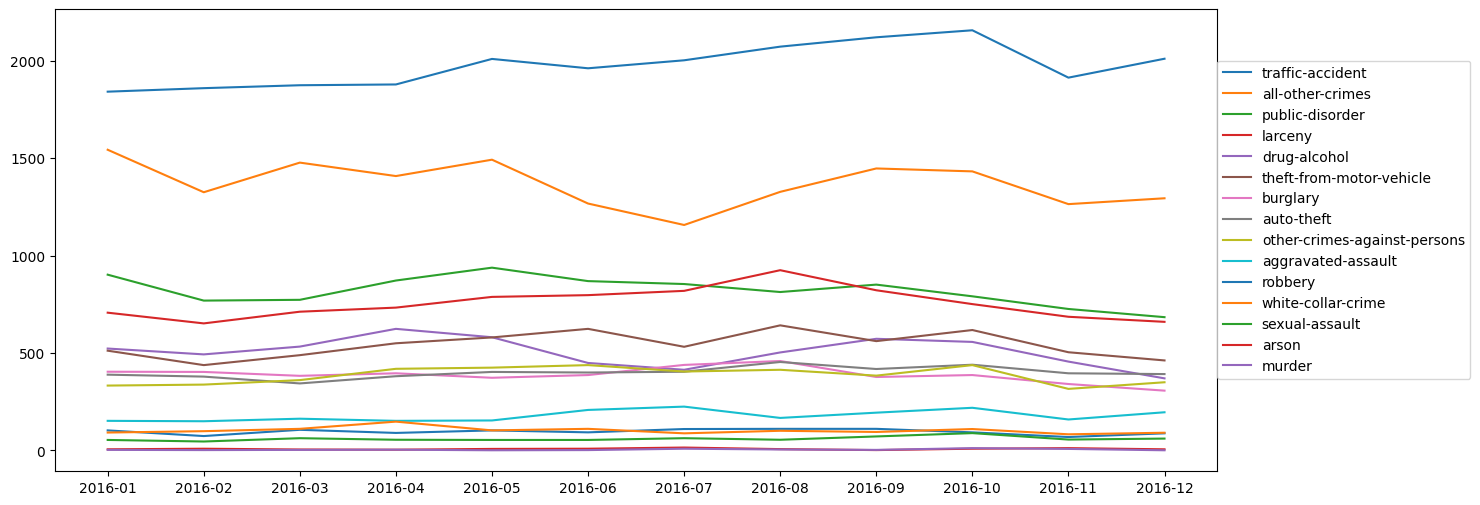

In [264]:
plt.figure(figsize = (15, 6))

plt.plot(crime_16_final.index, crime_16_final['traffic-accident'], label = 'traffic-accident')
plt.plot(crime_16_final.index, crime_16_final['all-other-crimes'], label = 'all-other-crimes')
plt.plot(crime_16_final.index, crime_16_final['public-disorder'], label = 'public-disorder')
plt.plot(crime_16_final.index, crime_16_final['larceny'], label = 'larceny')
plt.plot(crime_16_final.index, crime_16_final['drug-alcohol'], label = 'drug-alcohol')
plt.plot(crime_16_final.index, crime_16_final['theft-from-motor-vehicle'], label = 'theft-from-motor-vehicle')
plt.plot(crime_16_final.index, crime_16_final['burglary'], label = 'burglary')
plt.plot(crime_16_final.index, crime_16_final['auto-theft'], label = 'auto-theft')
plt.plot(crime_16_final.index, crime_16_final['other-crimes-against-persons'], label = 'other-crimes-against-persons')
plt.plot(crime_16_final.index, crime_16_final['aggravated-assault'], label = 'aggravated-assault')
plt.plot(crime_16_final.index, crime_16_final['robbery'], label = 'robbery')
plt.plot(crime_16_final.index, crime_16_final['white-collar-crime'], label = 'white-collar-crime')
plt.plot(crime_16_final.index, crime_16_final['sexual-assault'], label = 'sexual-assault')
plt.plot(crime_16_final.index, crime_16_final['arson'], label = 'arson')
plt.plot(crime_16_final.index, crime_16_final['murder'], label = 'murder')

plt.legend(loc = (1, 0.2))

plt.show()